In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts import physics, dataset

In [2]:
# # with this i look into all the different signals there are in the BSM-MC dataset that also have the right format!

# signal_list = dataset.bsm_keys()

# # our keys of interest are:

# # ggXToYYTo2Mu2E_m18
# # ttHto2B
# # GluGluHToTauTau

In [4]:
# this notebook serves for myself as an exploration of the 3 signals! and run just some small tests..

In [5]:
# loading all of it
nugun = dataset.load_dataset('NuGun_preprocessed.h5', 'full_data_cyl')
m18 = dataset.load_dataset('BSM_preprocessed.h5', 'ggXToYYTo2Mu2E_m18')
BB = dataset.load_dataset('BSM_preprocessed.h5', 'ttHto2B')
tautau = dataset.load_dataset('BSM_preprocessed.h5', 'GluGluHToTauTau') 

In [6]:
# now we load the ""variable of interest"" (there are probably better ones i just dont know them for now :))

dimu_nugun=physics.invariant_mass(nugun, 'muon')
dijet_nugun=physics.invariant_mass(nugun, 'jet')

dimu_m18=physics.invariant_mass(m18, 'muon')
dijet_tt=physics.invariant_mass(tautau, 'jet')
dijet_BB = physics.invariant_mass(BB, 'jet')

# takes super long. like already asked myself, how can i improve the efficiency of this bad boi? its taking too long...

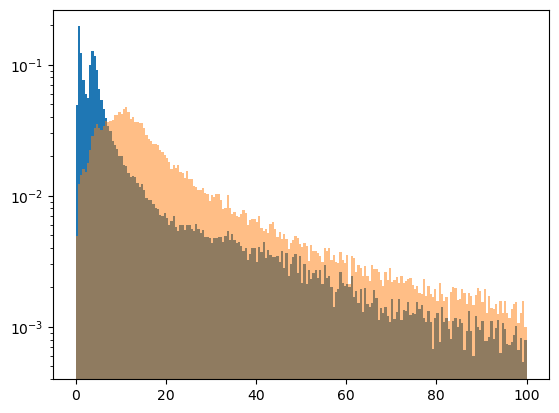

In [17]:
plt.hist(dimu_nugun, density=True, range=(0,100), log=True, bins=200)
plt.hist(dimu_m18, alpha=0.5, density=True, range=(0,100),log=True, bins=200)
pass

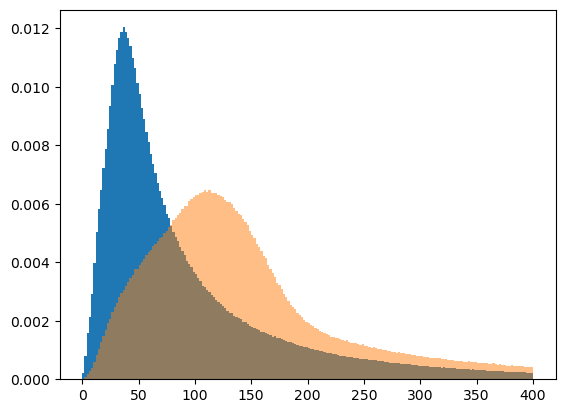

In [20]:
plt.hist(dijet_nugun, density=True, bins=200, range=(0,400))
plt.hist(dijet_tt, alpha=0.5, density=True, bins=200, range=(0,400))
pass

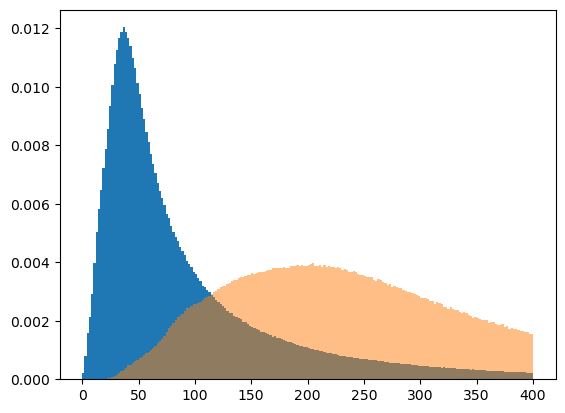

In [21]:
plt.hist(dijet_nugun, density=True, bins=200, range=(0,400))
plt.hist(dijet_BB, alpha=0.5, density=True, bins=200, range=(0,400))
pass

In [23]:
# now this part is just for some small checks :))
from isotree import IsolationForest
x_train, x_test = dataset.create_xtrain_xtest()

In [24]:
# create the model based on nugun train subset
# the scoring metric here is simply the one of the isolation forest (based on isolation depth!) but model is extended (ndim=3)
model = IsolationForest(ndim=3,ntrees=50).fit(x_train)

In [25]:
# make predicitions for all signals and testing subset of nugun
score_nugun = model.predict(x_test, output="score")
score_m18 = model.predict(m18, output="score")
score_BB= model.predict(BB, output="score")
score_tautau = model.predict(tautau, output="score")

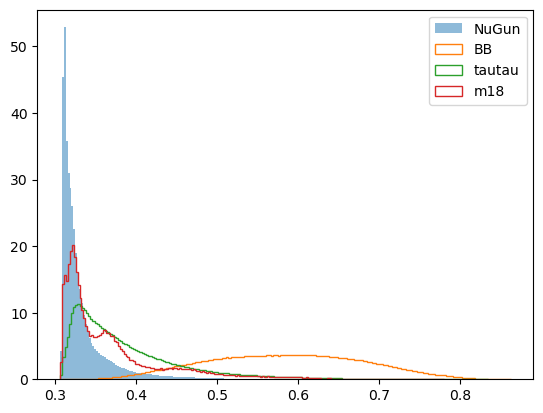

In [33]:
plt.hist(score_nugun, density=True, alpha=0.5,label='NuGun', bins=200)
plt.hist(score_BB, density=True,label='BB', bins=200, histtype='step')
plt.hist(score_tautau, density=True, label='tautau', bins=200, histtype='step')
plt.hist(score_m18, density=True, label='m18', bins=200, histtype='step')
plt.legend()

In [34]:
from sklearn.metrics import roc_curve, auc

In [38]:
# write this into python script ?

def plot_roc(FPR, TPR, AUC):
    plt.figure(figsize=(5, 4))
    plt.plot(np.linspace(0, 1), np.linspace(0, 1), '--', color='0.75')
    plt.xlim([10**-(6), 1.0])
    plt.ylim([10**-(6), 1.05])
    plt.axvline(0.00001, color='red', linestyle='dashed', linewidth=1) # threshold value for measuring anomaly detection efficiency
    plt.xlabel('False Positive Rate',fontsize=20)
    plt.ylabel('True Positive Rate',fontsize=20)
    plt.semilogx()
    plt.semilogy()

    plt.plot(FPR, TPR, lw=2, label='BB (AUC = %.1f%%)' % (AUC * 100))

    plt.legend(loc='lower right',fontsize=15)
    plt.tight_layout()

def get_roc_auc(score_0, score_1):
    labels = np.concatenate((np.ones(len(score_1)), np.zeros(len(score_0))))
    all = np.concatenate((score_1, score_0))
    FPR, TPR, _ = roc_curve(labels, all)
    AUC = auc(FPR, TPR)
    return FPR, TPR, AUC

In [37]:
fpr_BB, tpr_BB, auc_BB = get_roc_auc(score_nugun, score_BB)
fpr_tautau, tpr_tautau, auc_tautau = get_roc_auc(score_nugun, score_tautau)
fpr_m18, tpr_m18, auc_m18 = get_roc_auc(score_nugun, score_m18)

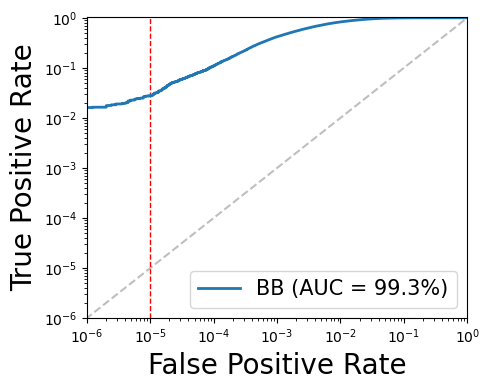

In [39]:
plot_roc(fpr_BB, tpr_BB, auc_BB)

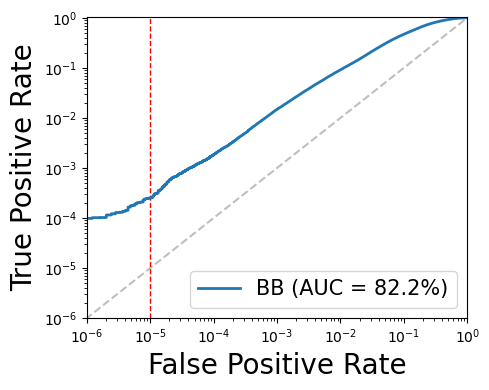

In [40]:
plot_roc(fpr_tautau, tpr_tautau, auc_tautau)

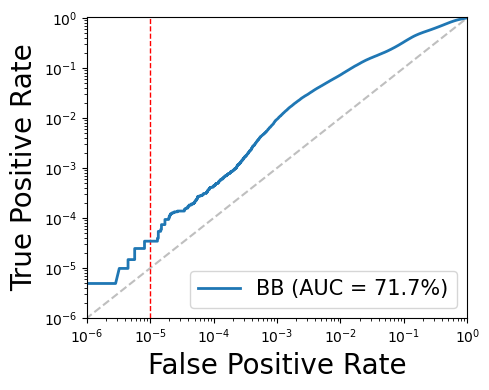

In [41]:
plot_roc(fpr_m18, tpr_m18, auc_m18)

In [42]:
# cool i think ??? :)))))))) idk